In [1]:
import csv
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# DeepMoD stuff
from deepymod import DeepMoD
from deepymod.model.func_approx import NN, Siren
from deepymod.model.library import Library1D
from deepymod.model.constraint import LeastSquares
from deepymod.model.sparse_estimators import Clustering, Threshold, PDEFIND
from deepymod.training import train
from deepymod.analysis import load_tensorboard
#from derivatives import library, finite_diff, spline_diff
from sklearn.linear_model import LassoCV

from deepymod.training.sparsity_scheduler import TrainTestPeriodic
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
# Settings for reproducibility
np.random.seed(42)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Figure paper

## Results DeepMoD

In [2]:
mask = np.array([False,False,True,False,False,True,False,False,False,False,False])

In [3]:
random_list = []
for k in [4,8,12]:
    df = load_tensorboard('runs/space_grid'+str(k))
    xi = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,11)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        random_list.append(1)
        print('correct')
    else: 
        random_list.append(0)
        print('wrong')

wrong
correct


IndexError: list index out of range

In [4]:
random_list = []
for k in [2,4,6,8,10,12,14,16,20,25,30]:
    df = load_tensorboard('runs/rand'+str(k))
    xi = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,11)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        random_list.append(1)
        print('correct')
    else: 
        random_list.append(0)
        print('wrong')

wrong
correct
wrong
correct
wrong
correct
correct
correct
correct
correct
correct


In [9]:
random_grid_list = []
for k in [2,4,6,8,10,12,14,16,20,25,30]:
    df = load_tensorboard('runs/random_grid'+str(k))
    xi = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,11)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        random_grid_list.append(1)
        print('correct')
    else: 
        random_grid_list.append(0)
        print('wrong')

wrong
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct


In [12]:
grid_list = [0]
for k in [4,6,8,10,12,14,16,20,25,30]:
    df = load_tensorboard('runs/grid'+str(k))
    xi = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,11)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        grid_list.append(1)
        print('correct')
    else: 
        grid_list.append(0)
        print('wrong')

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct


In [13]:
length = 8 
char_len = np.sqrt(0.1)

In [41]:
num_sam = [2,4,6,8,10,12,14,16,20,25,30]

In [42]:
x_labs = 8/(np.array(num_sam)*char_len)
x_labs = [str(round(i, 2)) for i in x_labs]

In [43]:
x_labs

['12.65',
 '6.32',
 '4.22',
 '3.16',
 '2.53',
 '2.11',
 '1.81',
 '1.58',
 '1.26',
 '1.01',
 '0.84']

[]

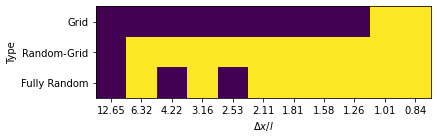

In [46]:
random_grid_list
plt.figure(figsize=(6, 3))
plt.imshow(np.array((grid_list,random_grid_list,random_list)),vmin=0, vmax=0.1)
plt.xlabel('$\Delta x/ l$')
plt.ylabel('Type')
plt.yticks([0,1,2],['Grid', 'Random-Grid', 'Fully Random'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],x_labs)
plt.plot()

In [19]:
if np.ma.allequal(xi.astype(bool), mask) == True:
    print('correct')
else: 
    print('wrong')

correct


In [24]:
df = load_tensorboard('runs/13/')
xi_13 = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,6)]))[:,-1]
df = load_tensorboard('runs/11/')
xi_11 = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,6)]))[:,-1]
df = load_tensorboard('runs/9/')
xi_9 = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,6)]))[:,-1]
df = load_tensorboard('runs/7/')
xi_7 = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,6)]))[:,-1]
df = load_tensorboard('runs/5c/')
xi_5 = np.abs(np.array([df.loc[:,'coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,6)]))[:,-1]

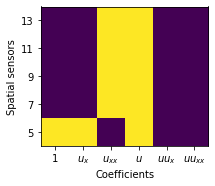

In [25]:
plt.figure(figsize=(3, 3))
plt.imshow(np.array((xi_13,xi_11,xi_9,xi_7,xi_5)),vmin=0, vmax=0.1)
plt.xlabel('Coefficients')
plt.ylabel('Spatial sensors')
plt.yticks([0,1,2,3,4],['13', '11', '9', '7','5'])
plt.xticks([0,1,2,3,4,5],[1,'$u_x$','$u_{xx}$','$u$','$u u_x$','$u u_{xx}$' ])
plt.savefig('cable_eq_1.pdf')